In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from tqdm import tqdm

c = 2.99792458e8 # 光速[m/s]
eps0 = 8.854187817e-12
mu0 = 1.2566370614e-6

In [46]:
dx = 0.002 # 空間差分間隔[m]
c = 299792458.0 # 光速[m/s]

dt = dx/c * 0.99 # 時間差分間隔[s]
f = 3.0e9 # 周波数[Hz]

nx = 1000 # 計算点数
nt = 5000 # 計算ステップ数
t = 0

## 磁気壁あり

100%|████████████████████████████████████| 5000/5000 [00:01<00:00, 4409.10it/s]


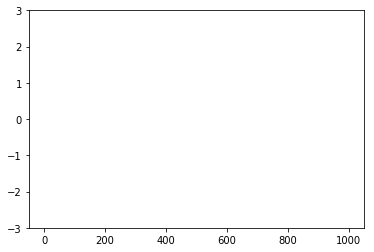

In [47]:
# 電気定数初期化と更新係数の計算
eps = np.full(nx, eps0)
mu = np.full(nx, mu0)
sigma = np.full(nx, 0.0)
sigmam = np.full(nx, 0.0)

# PML用のパラメータ
M = 3     # 吸収境界の導電率の上昇曲線の次数(2 - 3次が一般的)
R = 1e-6  # 境界面において実現したい反射係数
pmlN = 8 #PMLの層数、大きいほど計算コストが増えるが、反射率低減可

for ln in range(pmlN):
    sigma_value = ((pmlN - ln)/pmlN) ** M * ((M + 1) * (-np.log(R))/(2 * pmlN * dx * 120 * np.pi)) # PML吸収境界のsigma計算
    sigma[ln : ln + 1] = sigma_value
    sigma[-(ln + 1) : -ln] = sigma_value
    
    sigmam[ln : ln + 1] = mu0/eps0 * sigma_value
    sigmam[-(ln + 1) : -ln] = mu0/eps0 * sigma_value
    

ch = (2.0 * mu - sigmam * dt)/(2.0 * mu + sigmam * dt) # 式(12) - (14)の右辺第一項係数
dh = 2.0 * dt /((2.0 * mu * dx) + (sigmam * dt * dx)) # 式(12) - (14)の右辺第二項係数

ce = (2.0 * eps - sigma * dt)/(2.0 * eps + sigma * dt) # 式(12) - (14)の右辺第一項係数
de = 2.0 * dt /((2.0 * eps * dx) + (sigma * dt * dx)) # 式(12) - (14)の右辺第二項係数

E_y = np.zeros(nx)
E_z = np.zeros(nx)
H_y = np.zeros(nx)
H_z = np.zeros(nx)

fig = plt.figure()
image_list = []
for _ in tqdm(range(nt)):
    
    # 電界のy成分を励振
    E_y[nx//2] = np.sin(2.0 * np.pi * f * t)
    
    t += dt/2
    # 電界各成分計算
    E_y = ce * E_y - de * (H_z - np.roll(H_z, shift=1, axis=0))

    E_z = ce * E_z + de * (H_y - np.roll(H_y, shift=1, axis=0))
    
    # 電界のy成分を励振
    E_y[nx//2] = np.sin(2.0 * np.pi * f * t)
    
    t += dt/2

    H_y = ch * H_y - dh * (E_z - np.roll(E_z, shift=-1, axis=0))

    H_z = ch * H_z + dh * (E_y - np.roll(E_y, shift=-1, axis=0))
    
    if _%10 == 0:
        img = plt.plot(E_y, color="blue")
        plt.ylim(-3.0, 3.0)
        image_list.append(img)

ani = animation.ArtistAnimation(fig, image_list, interval=50)
ani.save("freeSpace_w_MW.gif", writer="pillow")

## 磁気壁なし

100%|████████████████████████████████████| 5000/5000 [00:01<00:00, 4139.06it/s]


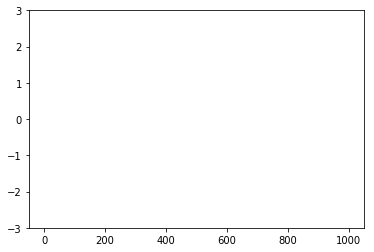

In [48]:
# 電気定数初期化と更新係数の計算
eps = np.full(nx, eps0)
mu = np.full(nx, mu0)
sigma = np.full(nx, 0.0)
sigmam = np.full(nx, 0.0)

# PML用のパラメータ
M = 3     # 吸収境界の導電率の上昇曲線の次数(2 - 3次が一般的)
R = 1e-6  # 境界面において実現したい反射係数
pmlN = 8 #PMLの層数、大きいほど計算コストが増えるが、反射率低減可

for ln in range(pmlN):
    sigma_value = ((pmlN - ln)/pmlN) ** M * ((M + 1) * (-np.log(R))/(2 * pmlN * dx * 120 * np.pi)) # PML吸収境界のsigma計算
    sigma[ln : ln + 1] = sigma_value
    sigma[-(ln + 1) : -ln] = sigma_value
    
dh = 2.0 * dt /((2.0 * mu * dx) + (sigmam * dt * dx)) # 式(12) - (14)の右辺第二項係数

ce = (2.0 * eps - sigma * dt)/(2.0 * eps + sigma * dt) # 式(12) - (14)の右辺第一項係数
de = 2.0 * dt /((2.0 * eps * dx) + (sigma * dt * dx)) # 式(12) - (14)の右辺第二項係数

E_y = np.zeros(nx)
E_z = np.zeros(nx)
H_y = np.zeros(nx)
H_z = np.zeros(nx)

fig = plt.figure()
image_list = []
for _ in tqdm(range(nt)):
    
    # 電界のy成分を励振
    E_y[nx//2] = np.sin(2.0 * np.pi * f * t)
    
    t += dt/2
    # 電界各成分計算
    E_y = ce * E_y - de * (H_z - np.roll(H_z, shift=1, axis=0))

    E_z = ce * E_z + de * (H_y - np.roll(H_y, shift=1, axis=0))
    
    # 電界のy成分を励振
    E_y[nx//2] = np.sin(2.0 * np.pi * f * t)
    
    t += dt/2

    H_y = H_y - dh * (E_z - np.roll(E_z, shift=-1, axis=0))

    H_z = H_z + dh * (E_y - np.roll(E_y, shift=-1, axis=0))
    
    if _%10 == 0:
        img = plt.plot(E_y, color="blue")
        plt.ylim(-3.0, 3.0)
        image_list.append(img)

ani = animation.ArtistAnimation(fig, image_list, interval=50)
ani.save("freeSpace_wo_MW.gif", writer="pillow")